In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [ ]:
df = pd.read_csv('/content/Agmarknet_Price_Report (1).csv')

In [ ]:
df.head()

,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
0,Varanasi,Varanasi(Grain),Wheat,Other,FAQ,660,700,685,01-Jan-03
1,Varanasi,Varanasi(Grain),Wheat,Other,FAQ,660,700,685,02-Jan-03
2,Varanasi,Varanasi(Grain),Wheat,Other,FAQ,660,700,685,03-Jan-03
3,Varanasi,Varanasi(Grain),Wheat,Other,FAQ,675,750,700,04-Jan-03
4,Varanasi,Varanasi(Grain),Wheat,Other,FAQ,680,750,700,06-Jan-03


In [ ]:
df.shape

(5651, 9)

In [ ]:
df2 = df.loc[df["District Name"] == "Varanasi", ["Modal Price (Rs./Quintal)", "Price Date"]]

In [ ]:
df2["Price Date"] = pd.to_datetime(df2["Price Date"])

In [ ]:
print(df2.columns)
print(df2)

Index(['Modal Price (Rs./Quintal)', 'Price Date'], dtype='object')
      Modal Price (Rs./Quintal) Price Date
0                           685 2003-01-01
1                           685 2003-01-02
2                           685 2003-01-03
3                           700 2003-01-04
4                           700 2003-01-06
...                         ...        ...
5646                       2520 2023-12-26
5647                       2515 2023-12-27
5648                       2515 2023-12-28
5649                       2510 2023-12-29
5650                       2515 2023-12-30

[5651 rows x 2 columns]


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5651 entries, 0 to 5650
Data columns (total 2 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Modal Price (Rs./Quintal)  5651 non-null   int64         
 1   Price Date                 5651 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 132.4 KB


In [ ]:
from sklearn.preprocessing import MinMaxScaler
modal_price_column = df2["Modal Price (Rs./Quintal)"].values.reshape(-1, 1)
scaler = MinMaxScaler()
scaledata= scaler.fit_transform(modal_price_column)

In [ ]:
type(scaledata)

numpy.ndarray

In [ ]:
len(scaledata)

5651

In [ ]:
def train_test_split(data,train=0.8,interval=15):
  train_size=int(0.8*len(data))
  train_X=[]
  train_Y=[]
  test_X=[]
  test_Y=[]
  for i in range(train_size):
    train_X.append(data[i:interval+i])
    train_Y.append(data[interval+i])

  for i in range(train_size,len(data)):
    if interval+i+1==len(data):
      break
    test_X.append(data[i:interval+i])
    test_Y.append(data[interval+i])
  return np.array(train_X),np.array(train_Y),np.array(test_X),np.array(test_Y)

In [ ]:
train_X,train_Y,test_X,test_Y=train_test_split(scaledata,interval=50)

In [ ]:
train_X.shape,train_Y.shape,test_X.shape,test_Y.shape

((4520, 50, 1), (4520, 1), (1080, 50, 1), (1080, 1))

evaluate_model_performance() : is a function which takes 4 arguments train_Y-the actual training data, test_Y-the actual testing data, train_predict-the predicted train data by model and test_predict-the predicted test data by model.
This function evaluates the model on the Mean

In [ ]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
def evaluate_model_performance(train_Y,test_Y,train_predict,test_predict):
  print("MAE for train data:",mean_absolute_error(scaler.inverse_transform(train_Y),train_predict))
  print("MAE for test data:",mean_absolute_error(scaler.inverse_transform(test_Y),test_predict))
  print("MSE for train data:",mean_squared_error(scaler.inverse_transform(train_Y),train_predict))
  print("MSE for test data:",mean_squared_error(scaler.inverse_transform(test_Y),test_predict))
  print("RMSE for train data:",math.sqrt(mean_squared_error(scaler.inverse_transform(train_Y),train_predict)))
  print("RMSE for test data:",math.sqrt(mean_squared_error(scaler.inverse_transform(test_Y),test_predict)))
  print("R2 score for train data:",r2_score(scaler.inverse_transform(train_Y),train_predict))
  print("R2 score for test data:",r2_score(scaler.inverse_transform(test_Y),test_predict))

In [ ]:
def plot_training_data(train_predict):
    plt.figure(figsize=(20, 10))
    plt.plot(df2["Price Date"].squeeze()[:4520], df2["Modal Price (Rs./Quintal)"].squeeze()[:4520], color="blue", label="Actual Price (Training)")
    plt.plot(df2["Price Date"].squeeze()[:4520], train_predict.squeeze(), color="green", label="Predicted Price (Training)")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.title("Actual vs. Predicted Prices (Training Data)")
    plt.gca().xaxis.set_major_locator(mdates.YearLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.legend()
    plt.show()

In [ ]:
def plot_testing_data(test_predict):
  plt.figure(figsize=(20, 10))
  plt.plot(df2["Price Date"].squeeze()[-1080:], df2["Modal Price (Rs./Quintal)"].squeeze()[-1080:], color="blue", label="Actual Price (Test)")
  plt.plot(df2["Price Date"].squeeze()[-1080:], test_predict.squeeze(), color="orange", label="Predicted Price (Test)")
  plt.xlabel("Date")
  plt.ylabel("Price")
  plt.title("Actual vs. Predicted Prices (Test Data)")
  plt.gca().xaxis.set_major_locator(mdates.YearLocator())
  plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
  plt.legend()
  plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, GRU, LSTM, Bidirectional
from tensorflow.keras.layers import Dense
import keras

**RNN**

In [ ]:
RNN = Sequential()
RNN.add(SimpleRNN(50, input_shape=(50, 1)))
RNN.add(Dense(1))
RNN.compile(loss='mean_squared_error', optimizer='adam')
RNN.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (None, 50)                2600      
                                                                 
 dense_8 (Dense)             (None, 1)                 51        
                                                                 
Total params: 2651 (10.36 KB)
Trainable params: 2651 (10.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
RNN.fit(train_X,train_Y,validation_data=(test_X,test_Y),epochs=100,batch_size=64, verbose=1)

Epoch 1/100
71/71 [==============================] - 3s 32ms/step - loss: 0.0010 - val_loss: 6.4496e-04
Epoch 2/100
71/71 [==============================] - 2s 29ms/step - loss: 3.5474e-04 - val_loss: 3.2629e-04
Epoch 3/100
71/71 [==============================] - 2s 34ms/step - loss: 3.3991e-04 - val_loss: 3.5576e-04
Epoch 4/100
71/71 [==============================] - 2s 33ms/step - loss: 3.2986e-04 - val_loss: 3.4255e-04
Epoch 5/100
71/71 [==============================] - 2s 29ms/step - loss: 3.3404e-04 - val_loss: 3.1214e-04
Epoch 6/100
71/71 [==============================] - 2s 28ms/step - loss: 3.1992e-04 - val_loss: 3.0931e-04
Epoch 7/100
71/71 [==============================] - 2s 29ms/step - loss: 2.9461e-04 - val_loss: 4.3865e-04
Epoch 8/100
71/71 [==============================] - 2s 30ms/step - loss: 3.1527e-04 - val_loss: 2.9495e-04
Epoch 9/100
71/71 [==============================] - 3s 42ms/step - loss: 2.9205e-04 - val_loss: 3.5450e-04
Epoch 10/100
71/71 [============

In [ ]:
train_predict=RNN.predict(train_X)
test_predict=RNN.predict(test_X)

34/34 [==============================] - 0s 5ms/step


In [ ]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
evaluate_model_performance(train_Y,test_Y,train_predict,test_predict)

MAE for train data: 12.197315614413373
MAE for test data: 20.00257760507088
MSE for train data: 1849.1214848497964
MSE for test data: 1557.0925288905005
RMSE for train data: 43.00141259133002
RMSE for test data: 39.46001177002486
R2 score for train data: 0.98525151237858
R2 score for test data: 0.9790719974539814


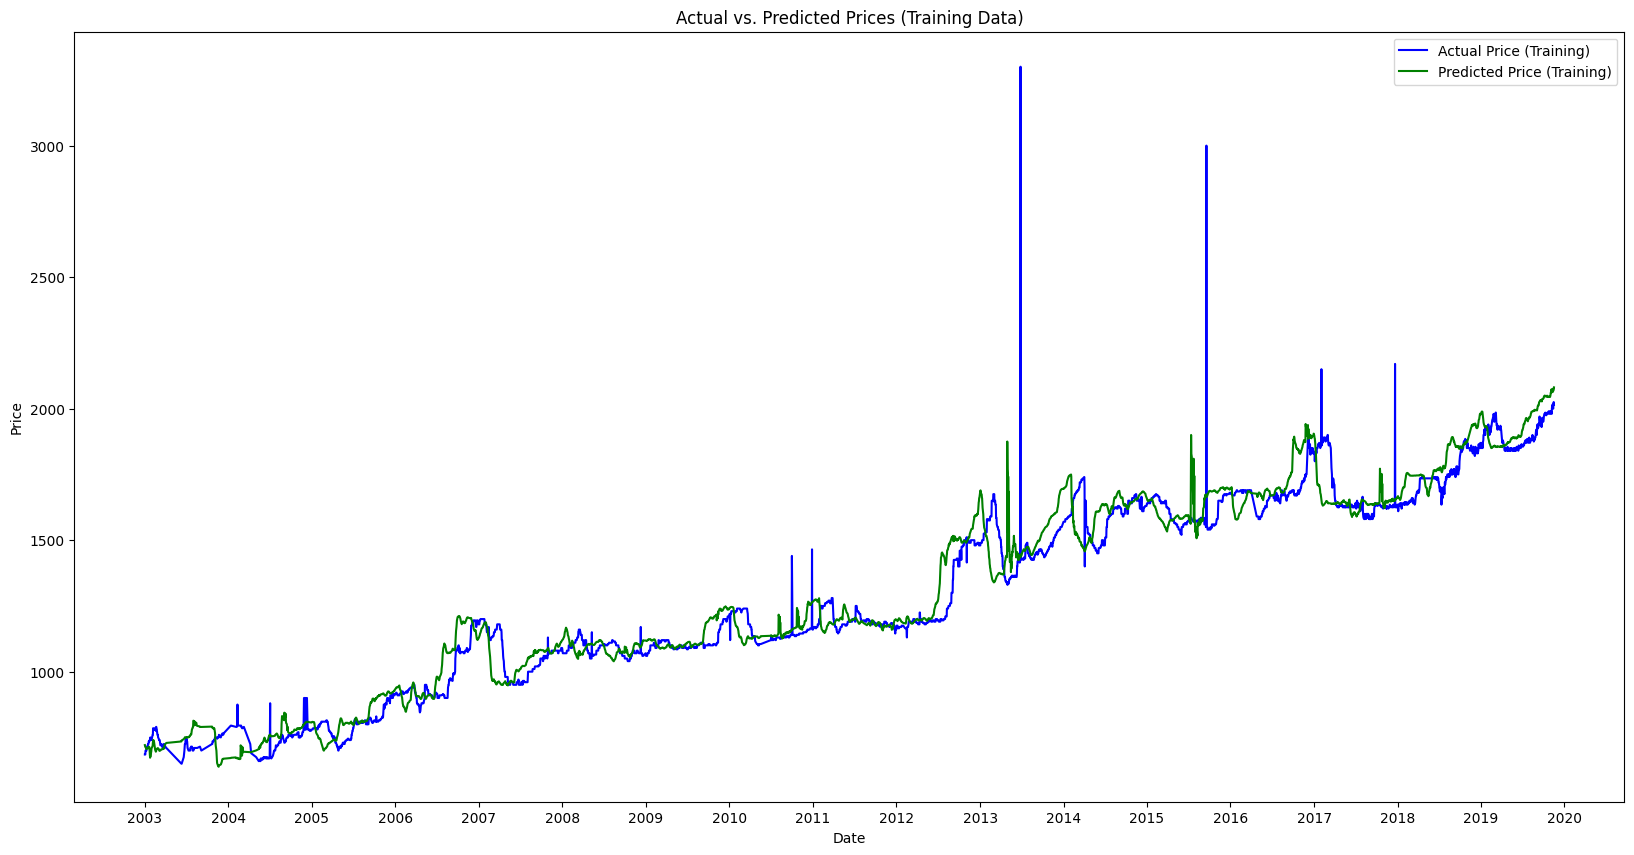

In [ ]:
plot_training_data(train_predict)

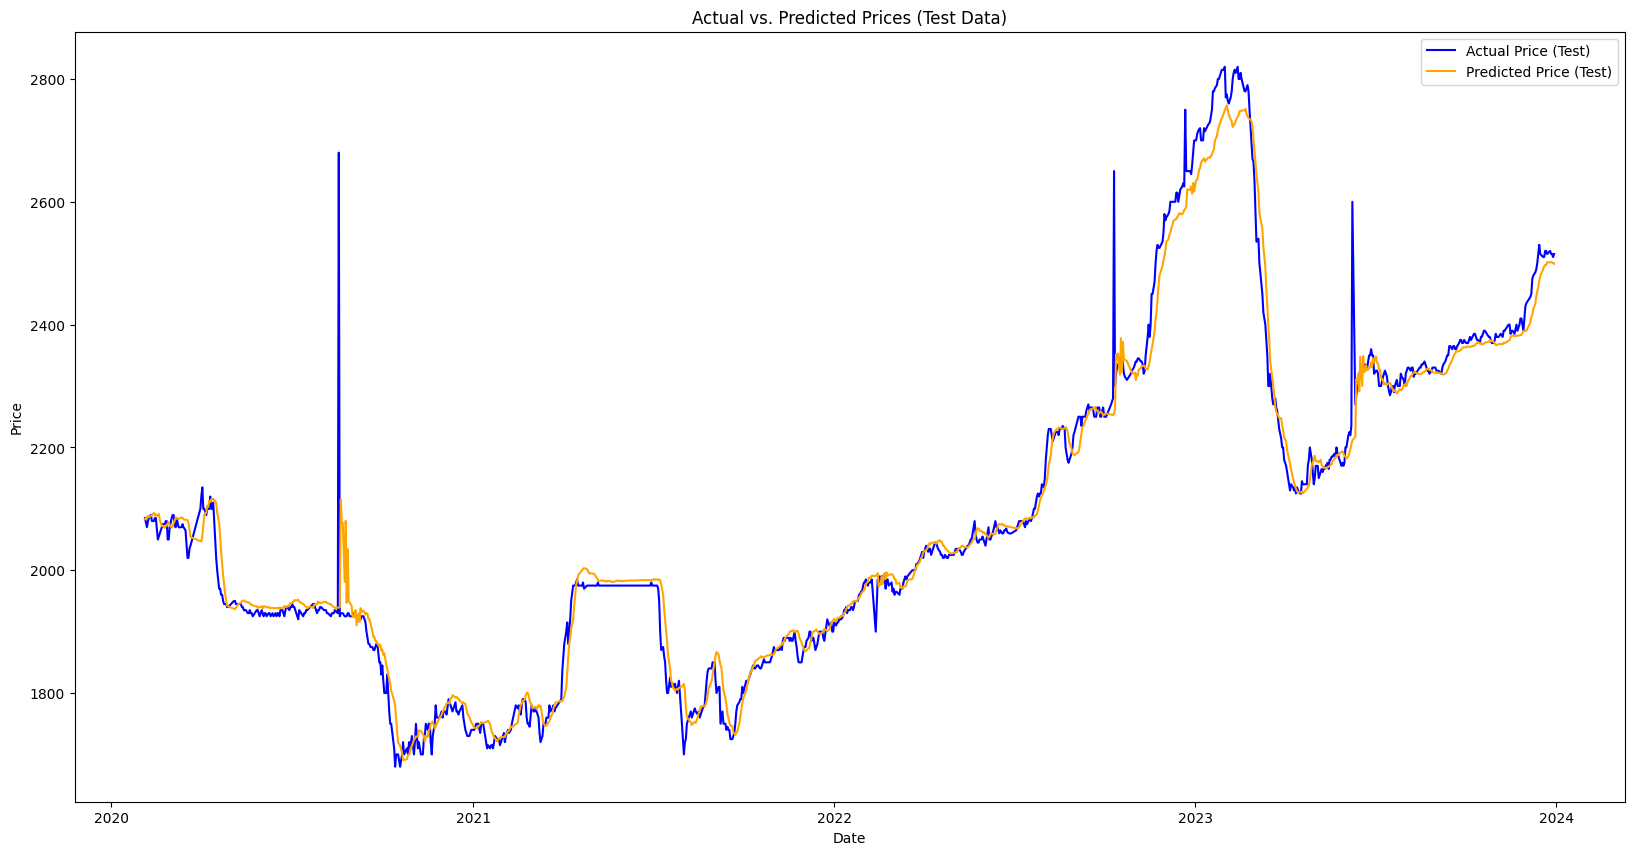

In [ ]:
plot_testing_data(test_predict)

**LSTM**

In [ ]:
LSTM1 = Sequential()
LSTM1.add(LSTM(50, return_sequences=True, input_shape=(50, 1)))
LSTM1.add(LSTM(50, return_sequences=True))
LSTM1.add(LSTM(50))
LSTM1.add(Dense(1))
LSTM1.compile(loss='huber_loss', optimizer='adam')
LSTM1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 50, 50)            20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
LSTM1.fit(train_X,train_Y,validation_data=(test_X,test_Y),epochs=100,batch_size=64, verbose=1)

Epoch 1/100
71/71 [==============================] - 8s 26ms/step - loss: 0.0024 - val_loss: 4.5578e-04
Epoch 2/100
71/71 [==============================] - 1s 13ms/step - loss: 1.7892e-04 - val_loss: 4.7181e-04
Epoch 3/100
71/71 [==============================] - 1s 15ms/step - loss: 1.6837e-04 - val_loss: 4.5680e-04
Epoch 4/100
71/71 [==============================] - 1s 12ms/step - loss: 1.7276e-04 - val_loss: 3.3424e-04
Epoch 5/100
71/71 [==============================] - 1s 11ms/step - loss: 1.7525e-04 - val_loss: 5.4483e-04
Epoch 6/100
71/71 [==============================] - 1s 11ms/step - loss: 1.6930e-04 - val_loss: 3.3585e-04
Epoch 7/100
71/71 [==============================] - 1s 11ms/step - loss: 1.6506e-04 - val_loss: 3.2054e-04
Epoch 8/100
71/71 [==============================] - 1s 11ms/step - loss: 1.7163e-04 - val_loss: 4.3384e-04
Epoch 9/100
71/71 [==============================] - 1s 11ms/step - loss: 1.6466e-04 - val_loss: 2.8776e-04
Epoch 10/100
71/71 [============

In [ ]:
train_predict=LSTM1.predict(train_X)
test_predict=LSTM1.predict(test_X)

34/34 [==============================] - 0s 4ms/step


In [ ]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
evaluate_model_performance(train_Y,test_Y,train_predict,test_predict)

MAE for train data: 10.827904638779899
MAE for test data: 23.673720635308094
MSE for train data: 1722.0198325861877
MSE for test data: 1891.4549748471322
RMSE for train data: 41.497226805970875
RMSE for test data: 43.49086081979905
R2 score for train data: 0.9862652679162396
R2 score for test data: 0.9745780203842568


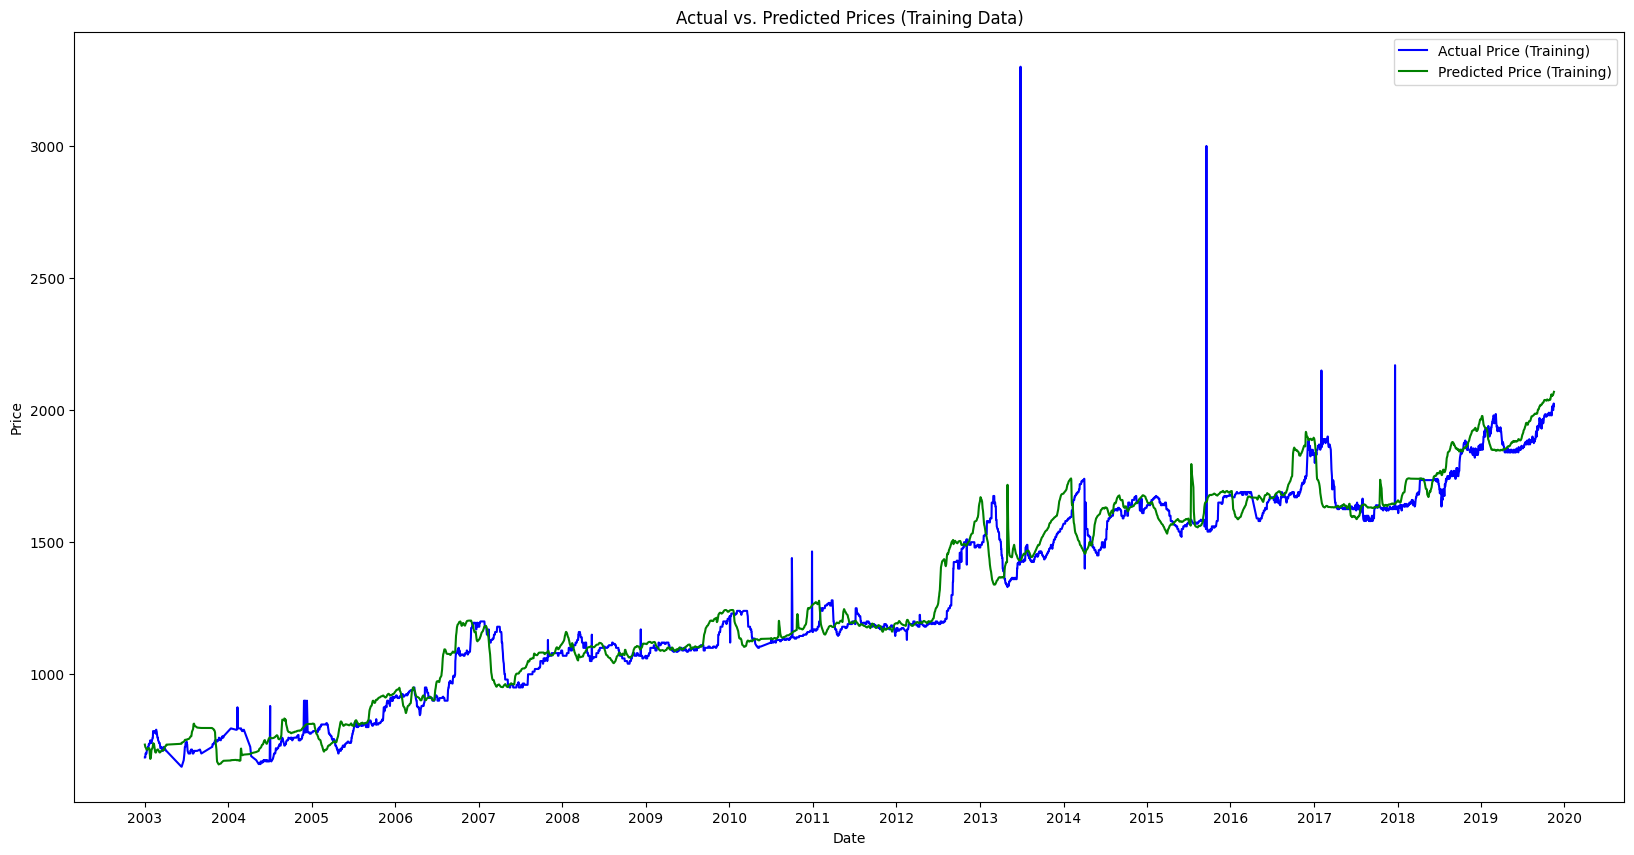

In [ ]:
plot_training_data(train_predict)

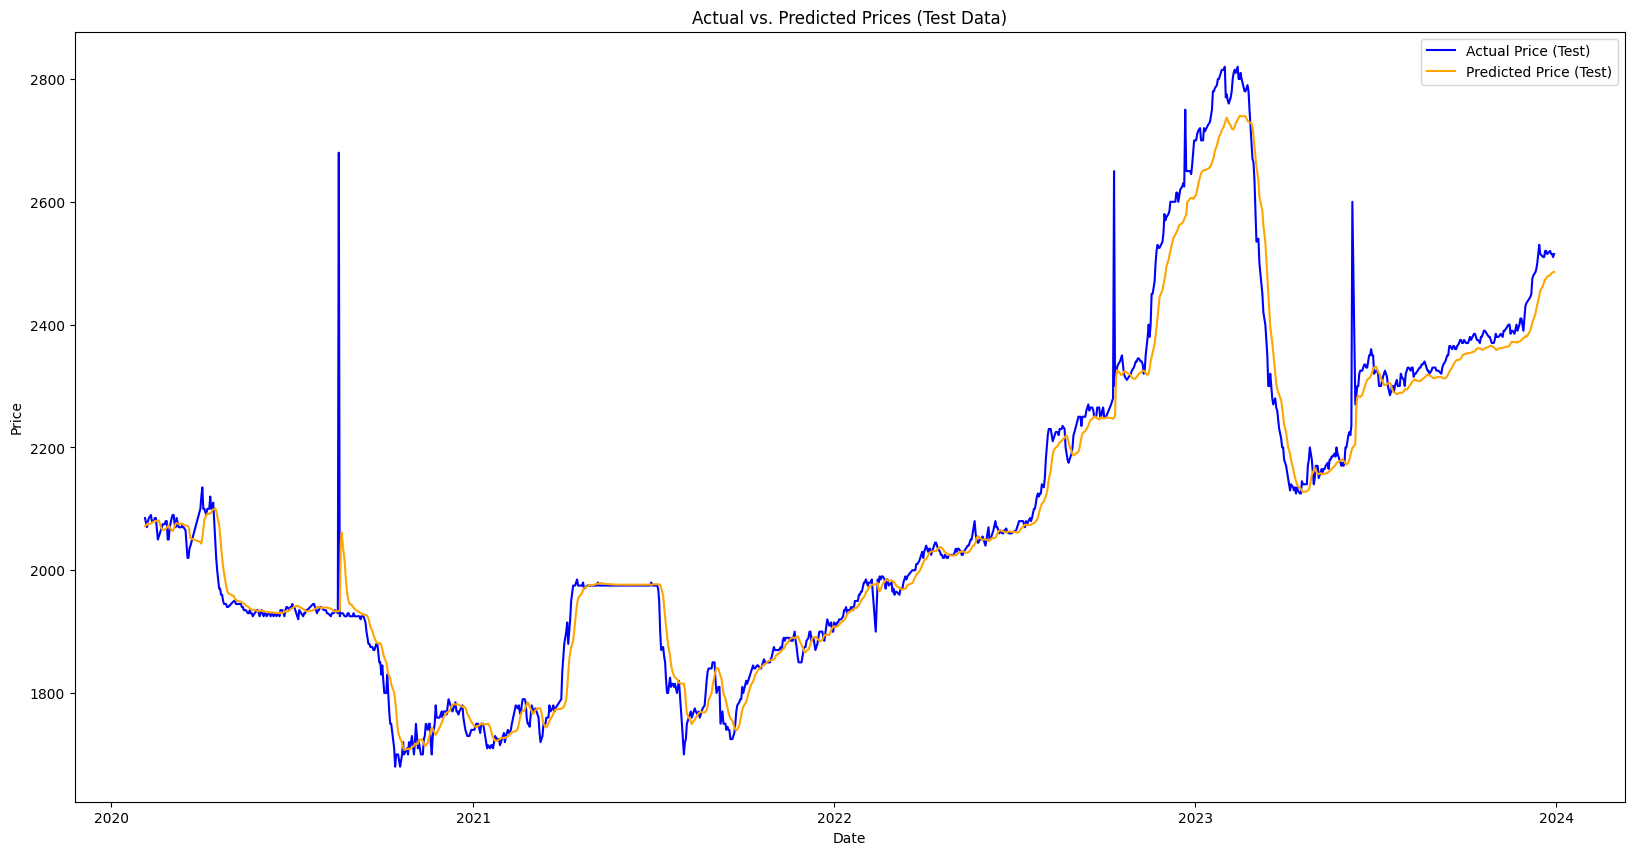

In [ ]:
plot_testing_data(test_predict)

**GRU**

In [ ]:
GRU1 = Sequential()
GRU1.add(GRU(50, return_sequences=True, input_shape=(50, 1)))
GRU1.add(GRU(50, return_sequences=True))
GRU1.add(GRU(50))
GRU1.add(Dense(1))
GRU1.compile(loss='mean_squared_error', optimizer='adam')
GRU1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 50, 50)            7950      
                                                                 
 gru_1 (GRU)                 (None, 50, 50)            15300     
                                                                 
 gru_2 (GRU)                 (None, 50)                15300     
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 38601 (150.79 KB)
Trainable params: 38601 (150.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
GRU1.fit(train_X,train_Y,validation_data=(test_X,test_Y),epochs=100,batch_size=64, verbose=1)

Epoch 1/100
71/71 [==============================] - 6s 23ms/step - loss: 0.0046 - val_loss: 2.6077e-04
Epoch 2/100
71/71 [==============================] - 1s 10ms/step - loss: 2.6558e-04 - val_loss: 2.6025e-04
Epoch 3/100
71/71 [==============================] - 1s 10ms/step - loss: 2.6576e-04 - val_loss: 2.6175e-04
Epoch 4/100
71/71 [==============================] - 1s 10ms/step - loss: 2.6621e-04 - val_loss: 2.5380e-04
Epoch 5/100
71/71 [==============================] - 1s 11ms/step - loss: 2.6099e-04 - val_loss: 2.5415e-04
Epoch 6/100
71/71 [==============================] - 1s 14ms/step - loss: 2.7055e-04 - val_loss: 2.8137e-04
Epoch 7/100
71/71 [==============================] - 1s 14ms/step - loss: 2.6511e-04 - val_loss: 2.5268e-04
Epoch 8/100
71/71 [==============================] - 1s 10ms/step - loss: 2.7258e-04 - val_loss: 3.9202e-04
Epoch 9/100
71/71 [==============================] - 1s 10ms/step - loss: 2.7704e-04 - val_loss: 2.4537e-04
Epoch 10/100
71/71 [============

In [ ]:
train_predict=GRU1.predict(train_X)
test_predict=GRU1.predict(test_X)

34/34 [==============================] - 0s 4ms/step


In [ ]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
evaluate_model_performance(train_Y,test_Y,train_predict,test_predict)

MAE for train data: 14.372974861617632
MAE for test data: 32.04829847547731
MSE for train data: 1726.4908183501163
MSE for test data: 2137.621141228154
RMSE for train data: 41.551062782438144
RMSE for test data: 46.23441511718467
R2 score for train data: 0.986229607588492
R2 score for test data: 0.97126943976931


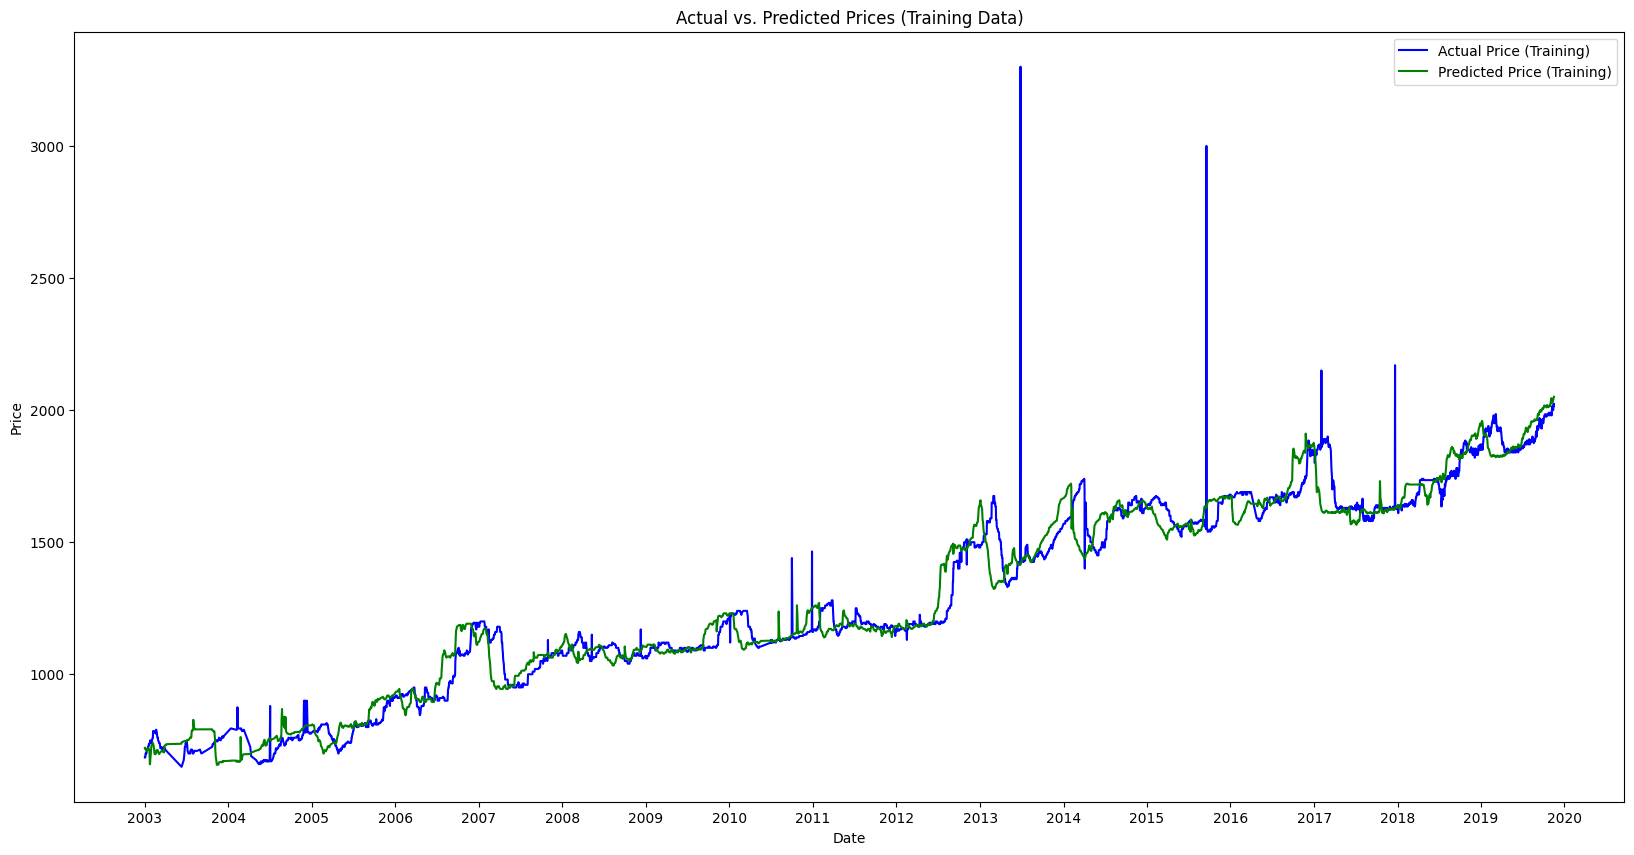

In [ ]:
plot_training_data(train_predict)

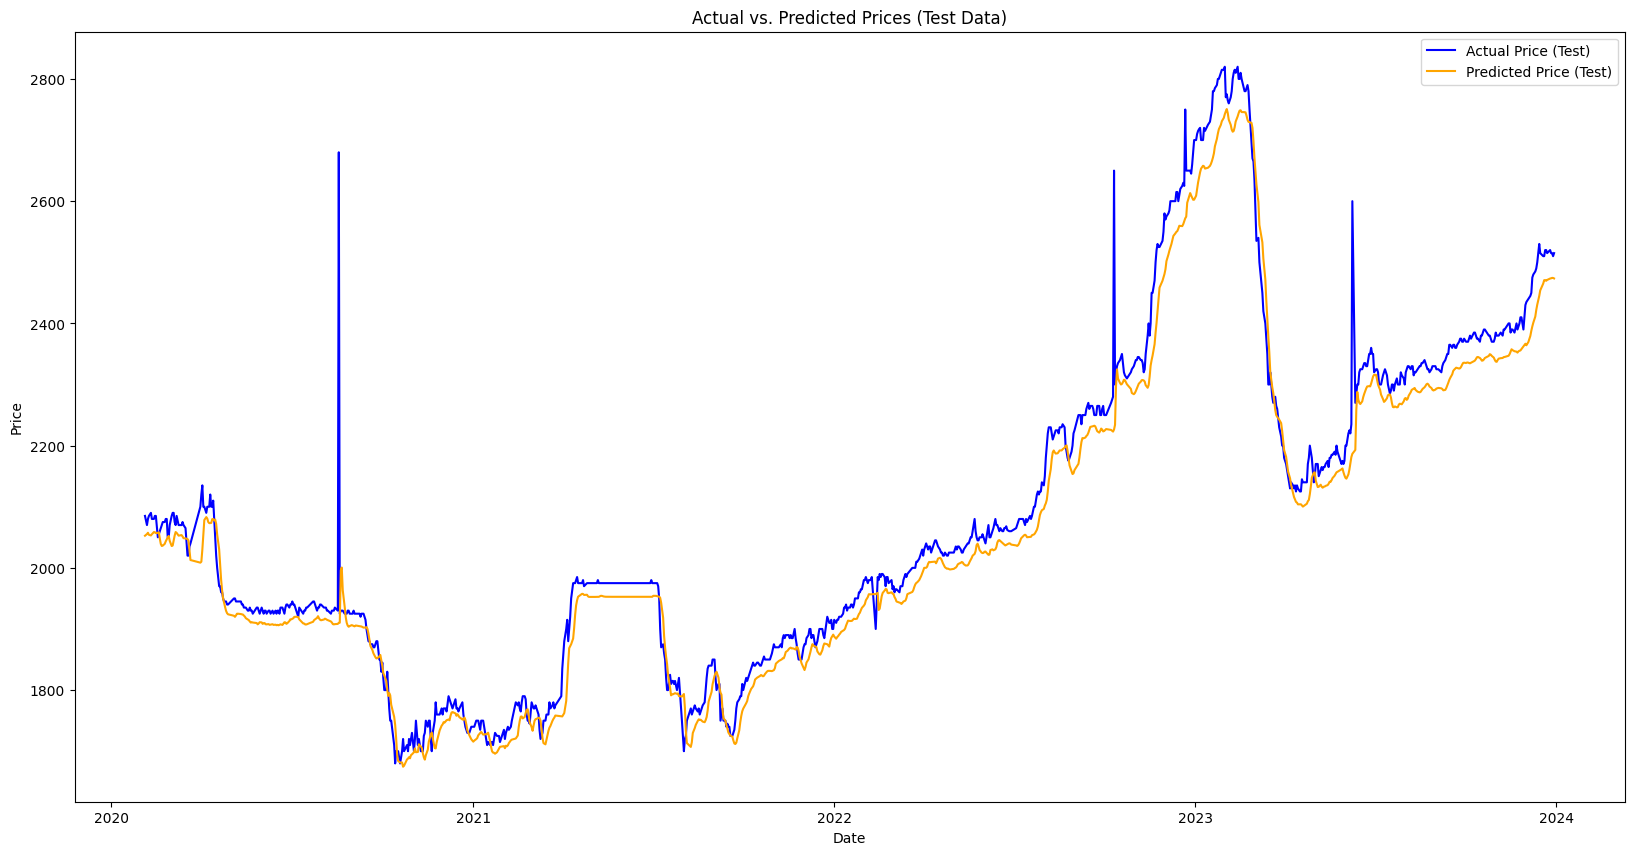

In [ ]:
plot_testing_data(test_predict)

**Bidirectional RNN**

In [ ]:
Bidirectional_RNN = Sequential()
Bidirectional_RNN.add(Bidirectional(SimpleRNN(50), input_shape=(50, 1)))
Bidirectional_RNN.add(Dense(1))
Bidirectional_RNN.compile(loss='huber_loss', optimizer='adam')
Bidirectional_RNN.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_14 (Bidirect  (None, 100)               5200      
 ional)                                                          
                                                                 
 dense_11 (Dense)            (None, 1)                 101       
                                                                 
Total params: 5301 (20.71 KB)
Trainable params: 5301 (20.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
Bidirectional_RNN.fit(train_X,train_Y,validation_data=(test_X,test_Y),epochs=100,batch_size=64, verbose=1)

Epoch 1/100
71/71 [==============================] - 4s 53ms/step - loss: 1.2943e-04 - val_loss: 2.2279e-04
Epoch 2/100
71/71 [==============================] - 4s 53ms/step - loss: 1.2993e-04 - val_loss: 4.0068e-04
Epoch 3/100
71/71 [==============================] - 5s 65ms/step - loss: 1.2592e-04 - val_loss: 3.4810e-04
Epoch 4/100
71/71 [==============================] - 4s 52ms/step - loss: 1.2327e-04 - val_loss: 2.2209e-04
Epoch 5/100
71/71 [==============================] - 4s 52ms/step - loss: 1.3620e-04 - val_loss: 2.7738e-04
Epoch 6/100
71/71 [==============================] - 5s 65ms/step - loss: 1.2561e-04 - val_loss: 2.3985e-04
Epoch 7/100
71/71 [==============================] - 4s 53ms/step - loss: 1.2659e-04 - val_loss: 1.8981e-04
Epoch 8/100
71/71 [==============================] - 4s 52ms/step - loss: 1.2923e-04 - val_loss: 1.3265e-04
Epoch 9/100
71/71 [==============================] - 5s 66ms/step - loss: 1.2888e-04 - val_loss: 2.0119e-04
Epoch 10/100
71/71 [========

In [ ]:
train_predict=Bidirectional_RNN.predict(train_X)
test_predict=Bidirectional_RNN.predict(test_X)

34/34 [==============================] - 0s 9ms/step


In [ ]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
evaluate_model_performance(train_Y,test_Y,train_predict,test_predict)

MAE for train data: 10.414911172242288
MAE for test data: 29.66770347312635
MSE for train data: 1620.9315232891843
MSE for test data: 2787.5275047573296
RMSE for train data: 40.26079387306197
RMSE for test data: 52.79704068181596
R2 score for train data: 0.9870715425123396
R2 score for test data: 0.9625344148570115


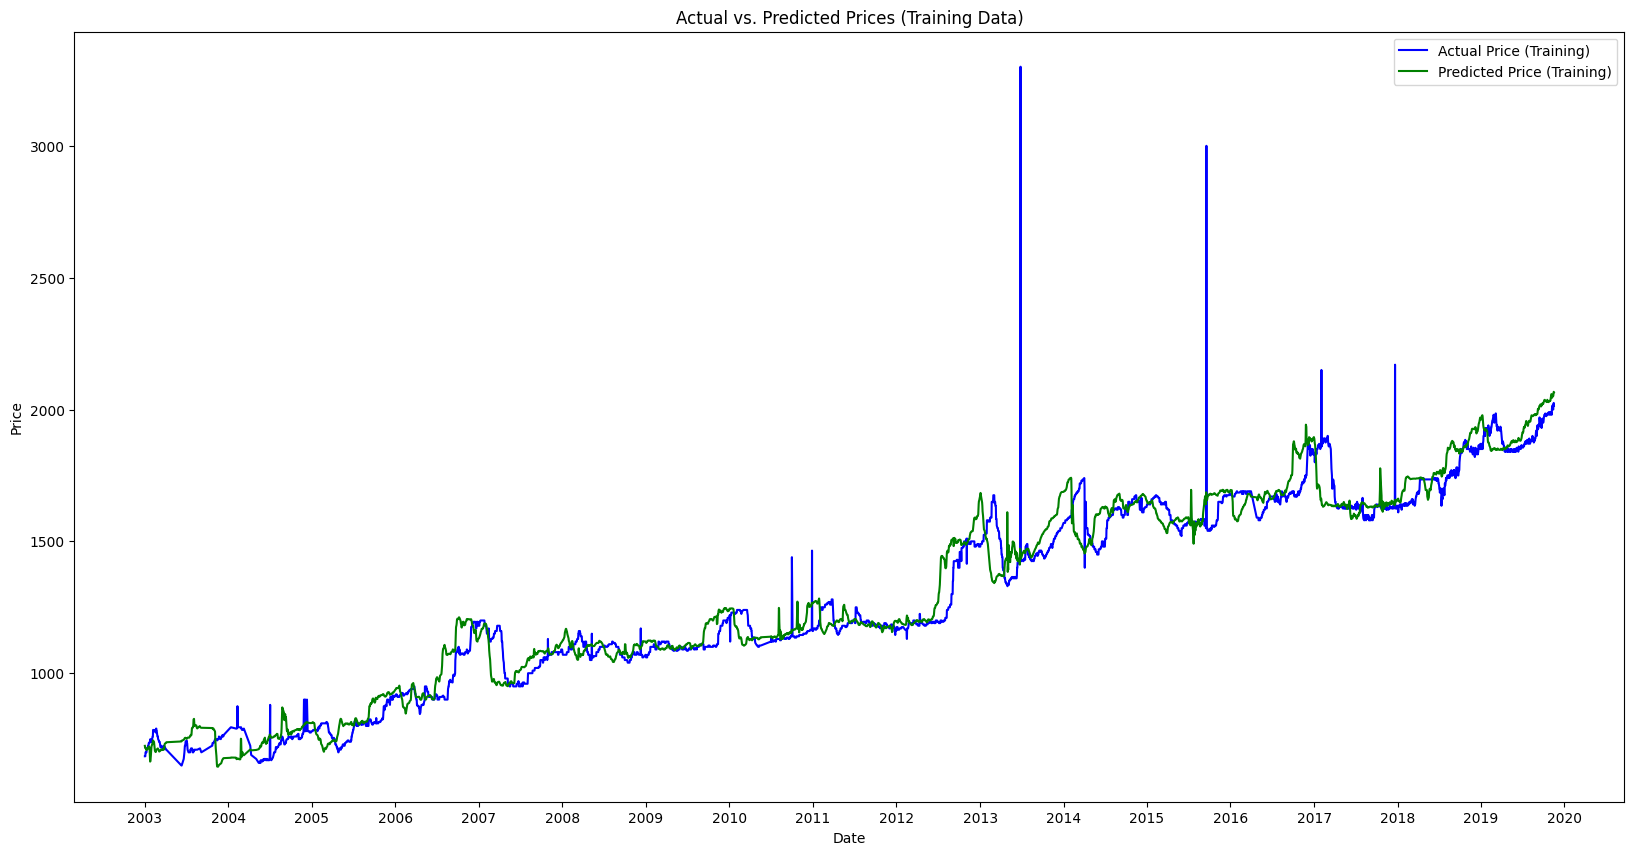

In [ ]:
plot_training_data(train_predict)

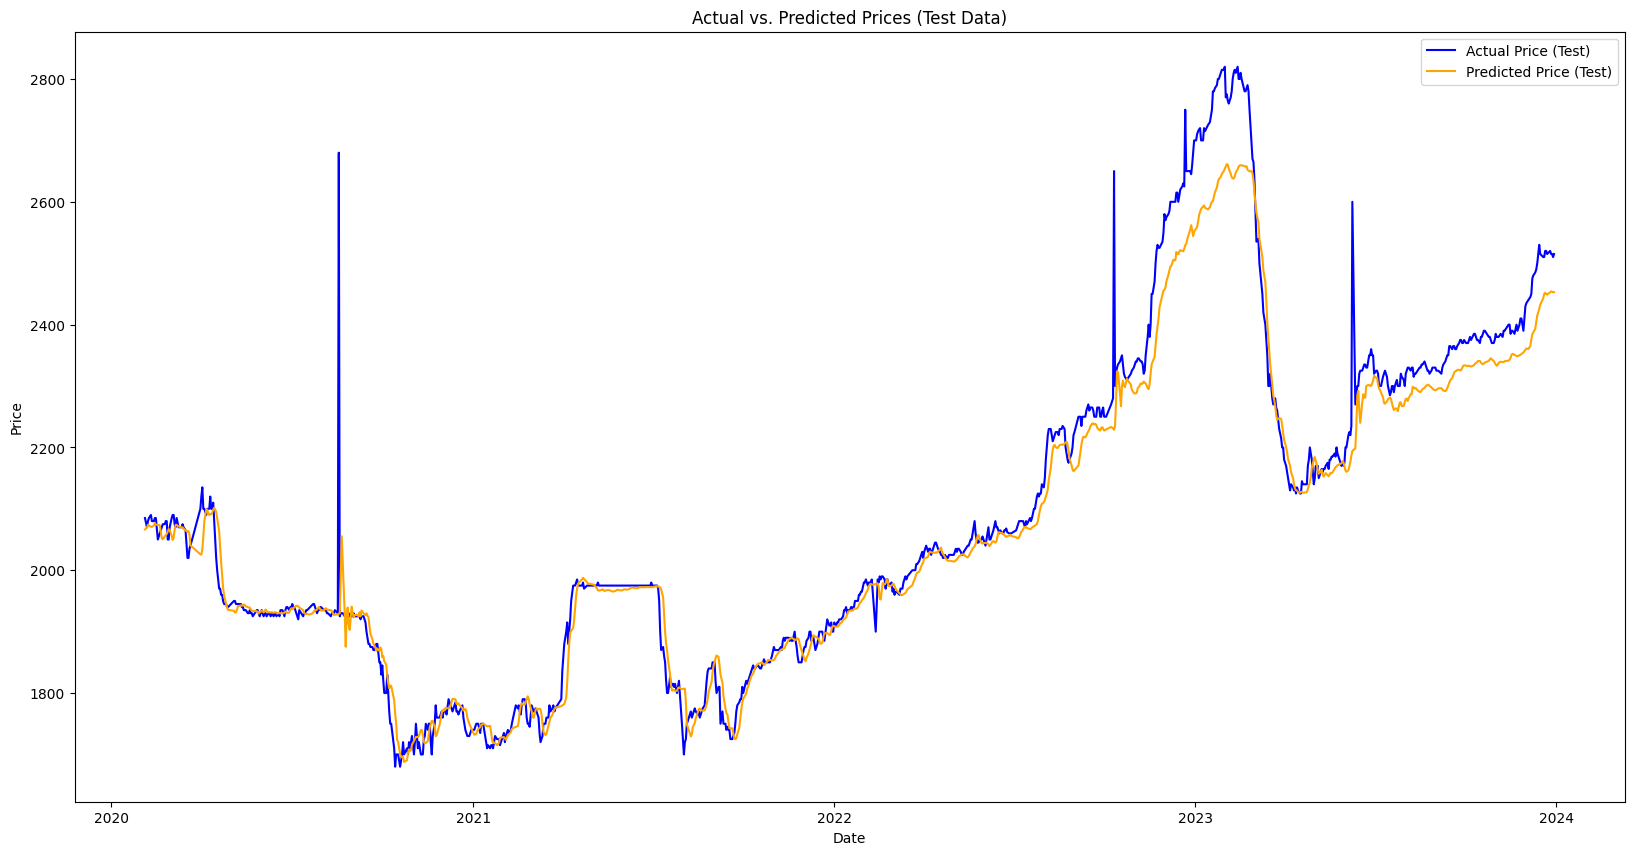

In [ ]:
plot_testing_data(test_predict)

**Bidirectional LSTM**

In [ ]:
Bidirectional_LSTM = Sequential()
Bidirectional_LSTM.add(Bidirectional(LSTM(50, return_sequences=True), input_shape=(50, 1)))
Bidirectional_LSTM.add(Bidirectional(LSTM(50, return_sequences=True)))
Bidirectional_LSTM.add(Bidirectional(LSTM(50)))
Bidirectional_LSTM.add(Dense(1))
Bidirectional_LSTM.compile(loss='huber_loss', optimizer='adam')
Bidirectional_LSTM.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_11 (Bidirect  (None, 50, 100)           20800     
 ional)                                                          
                                                                 
 bidirectional_12 (Bidirect  (None, 50, 100)           60400     
 ional)                                                          
                                                                 
 bidirectional_13 (Bidirect  (None, 100)               60400     
 ional)                                                          
                                                                 
 dense_10 (Dense)            (None, 1)                 101       
                                                                 
Total params: 141701 (553.52 KB)
Trainable params: 141701 (553.52 KB)
Non-trainable params: 0 (0.00 Byte)
_____________

In [ ]:
Bidirectional_LSTM.fit(train_X,train_Y,validation_data=(test_X,test_Y),epochs=100,batch_size=64, verbose=1)

Epoch 1/100
71/71 [==============================] - 12s 55ms/step - loss: 0.0020 - val_loss: 8.4817e-04
Epoch 2/100
71/71 [==============================] - 1s 18ms/step - loss: 2.1408e-04 - val_loss: 4.8612e-04
Epoch 3/100
71/71 [==============================] - 1s 19ms/step - loss: 1.9052e-04 - val_loss: 3.7362e-04
Epoch 4/100
71/71 [==============================] - 1s 19ms/step - loss: 1.6945e-04 - val_loss: 2.8685e-04
Epoch 5/100
71/71 [==============================] - 1s 19ms/step - loss: 1.6618e-04 - val_loss: 2.2082e-04
Epoch 6/100
71/71 [==============================] - 1s 19ms/step - loss: 1.4947e-04 - val_loss: 1.8746e-04
Epoch 7/100
71/71 [==============================] - 1s 19ms/step - loss: 1.4343e-04 - val_loss: 2.9731e-04
Epoch 8/100
71/71 [==============================] - 2s 22ms/step - loss: 1.7302e-04 - val_loss: 2.0559e-04
Epoch 9/100
71/71 [==============================] - 2s 24ms/step - loss: 1.3941e-04 - val_loss: 4.8378e-04
Epoch 10/100
71/71 [===========

In [ ]:
train_predict=Bidirectional_LSTM.predict(train_X)
test_predict=Bidirectional_LSTM.predict(test_X)

34/34 [==============================] - 0s 7ms/step


In [ ]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
evaluate_model_performance(train_Y,test_Y,train_predict,test_predict)

MAE for train data: 10.563518557928305
MAE for test data: 20.577649830005807
MSE for train data: 1721.902475341747
MSE for test data: 1769.5077606742325
RMSE for train data: 41.49581274468241
RMSE for test data: 42.06551747778972
R2 score for train data: 0.9862662039509356
R2 score for test data: 0.976217044116847


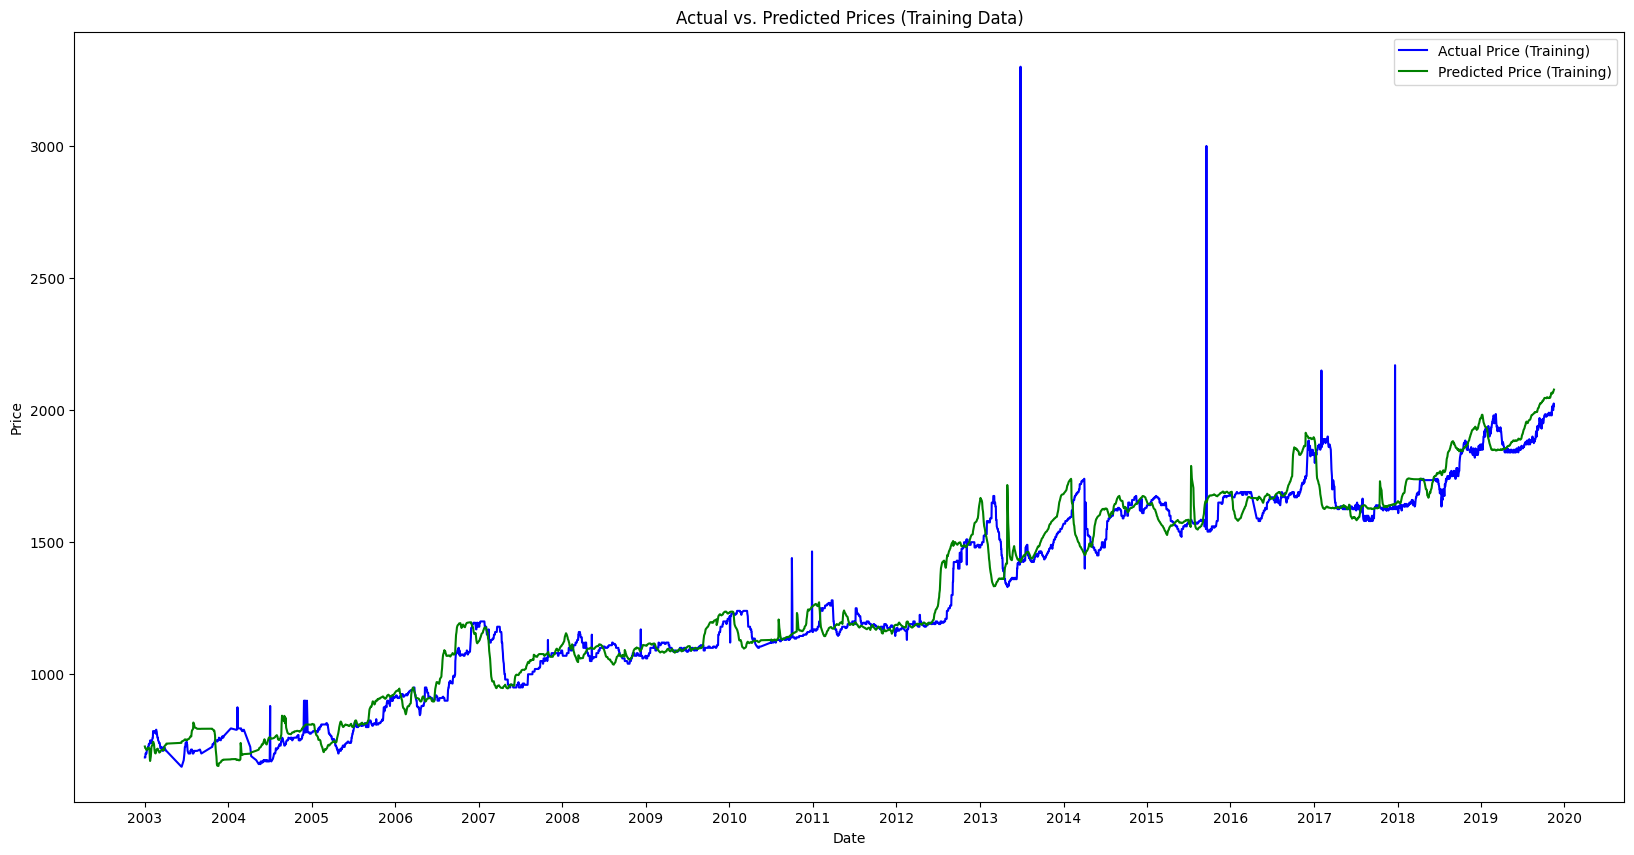

In [ ]:
plot_training_data(train_predict)

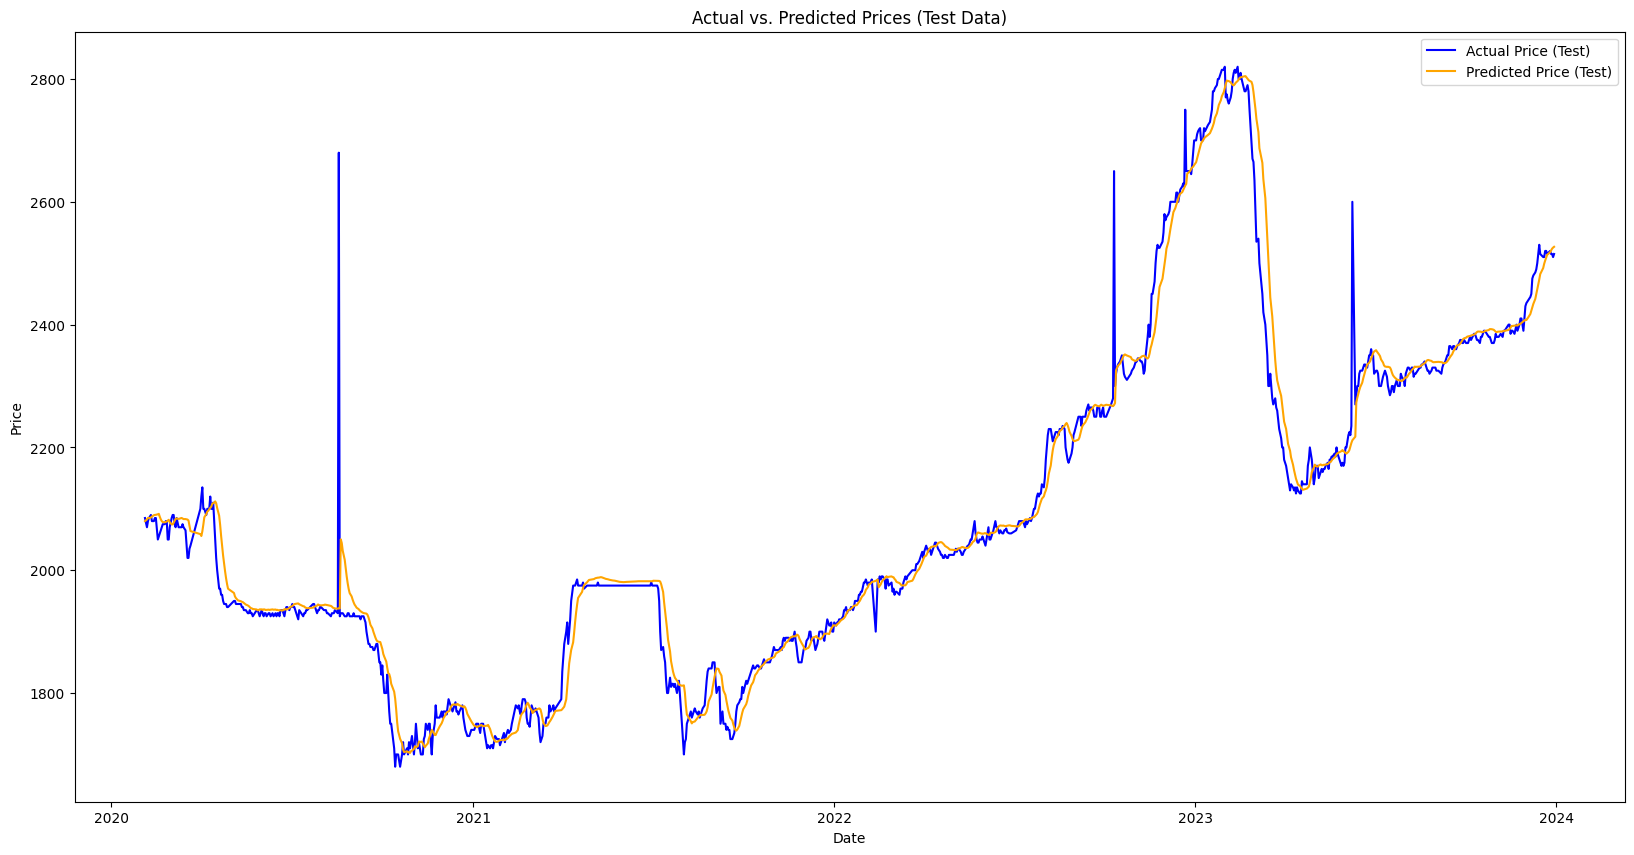

In [ ]:
plot_testing_data(test_predict)

**Bidirectional GRU**

In [ ]:
Bidirectional_GRU = Sequential()
Bidirectional_GRU.add(Bidirectional(GRU(50, return_sequences=True), input_shape=(50, 1)))
Bidirectional_GRU.add(Bidirectional(GRU(50, return_sequences=True)))
Bidirectional_GRU.add(Bidirectional(GRU(50)))
Bidirectional_GRU.add(Dense(1))
Bidirectional_GRU.compile(loss='mean_squared_error', optimizer='adam')
Bidirectional_GRU.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_7 (Bidirecti  (None, 50, 100)           15900     
 onal)                                                           
                                                                 
 bidirectional_8 (Bidirecti  (None, 50, 100)           45600     
 onal)                                                           
                                                                 
 bidirectional_9 (Bidirecti  (None, 100)               45600     
 onal)                                                           
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 107201 (418.75 KB)
Trainable params: 107201 (418.75 KB)
Non-trainable params: 0 (0.00 Byte)
______________

In [ ]:
Bidirectional_GRU.fit(train_X,train_Y,validation_data=(test_X,test_Y),epochs=100,batch_size=64, verbose=1)

Epoch 1/100
71/71 [==============================] - 12s 42ms/step - loss: 0.0034 - val_loss: 0.0013
Epoch 2/100
71/71 [==============================] - 2s 25ms/step - loss: 3.9025e-04 - val_loss: 6.9492e-04
Epoch 3/100
71/71 [==============================] - 1s 18ms/step - loss: 3.2141e-04 - val_loss: 3.8948e-04
Epoch 4/100
71/71 [==============================] - 1s 18ms/step - loss: 2.8076e-04 - val_loss: 3.0070e-04
Epoch 5/100
71/71 [==============================] - 1s 18ms/step - loss: 2.7288e-04 - val_loss: 2.9447e-04
Epoch 6/100
71/71 [==============================] - 1s 18ms/step - loss: 2.6909e-04 - val_loss: 9.6348e-04
Epoch 7/100
71/71 [==============================] - 1s 18ms/step - loss: 2.8540e-04 - val_loss: 2.4515e-04
Epoch 8/100
71/71 [==============================] - 1s 17ms/step - loss: 2.6795e-04 - val_loss: 5.0926e-04
Epoch 9/100
71/71 [==============================] - 1s 17ms/step - loss: 2.7940e-04 - val_loss: 6.0090e-04
Epoch 10/100
71/71 [===============

In [ ]:
train_predict=Bidirectional_GRU.predict(train_X)
test_predict=Bidirectional_GRU.predict(test_X)

34/34 [==============================] - 0s 7ms/step


In [ ]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
evaluate_model_performance(train_Y,test_Y,train_predict,test_predict)

MAE for train data: 9.941623532455576
MAE for test data: 22.671784464518122
MSE for train data: 1574.1916787110029
MSE for test data: 1718.84159535703
RMSE for train data: 39.676084467989064
RMSE for test data: 41.45891454629547
R2 score for train data: 0.9874443368499948
R2 score for test data: 0.9768980194712859


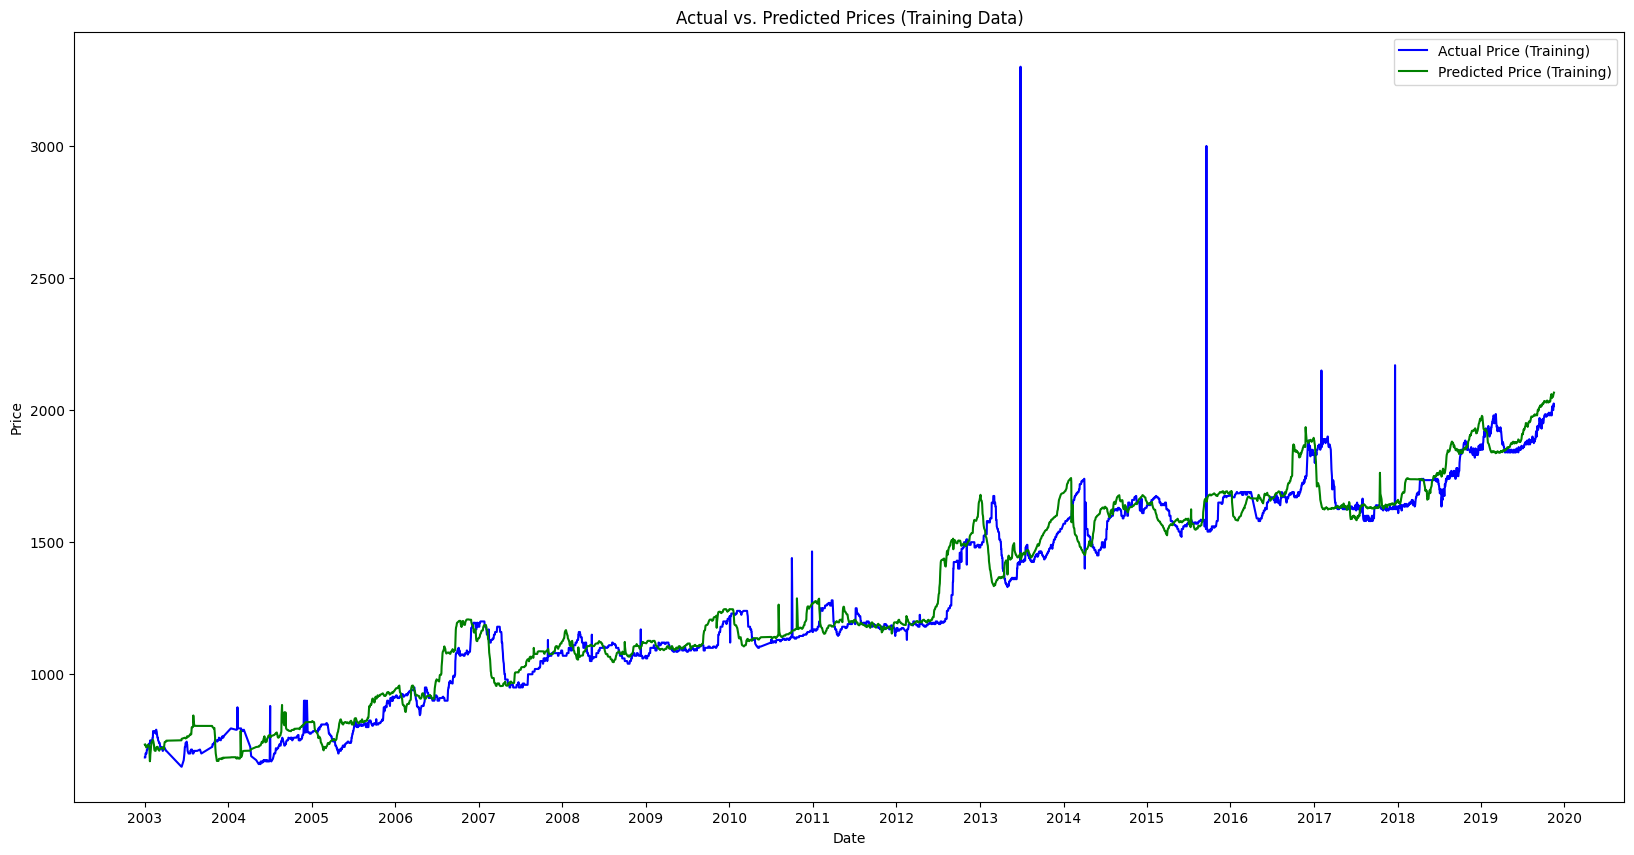

In [ ]:
plot_training_data(train_predict)

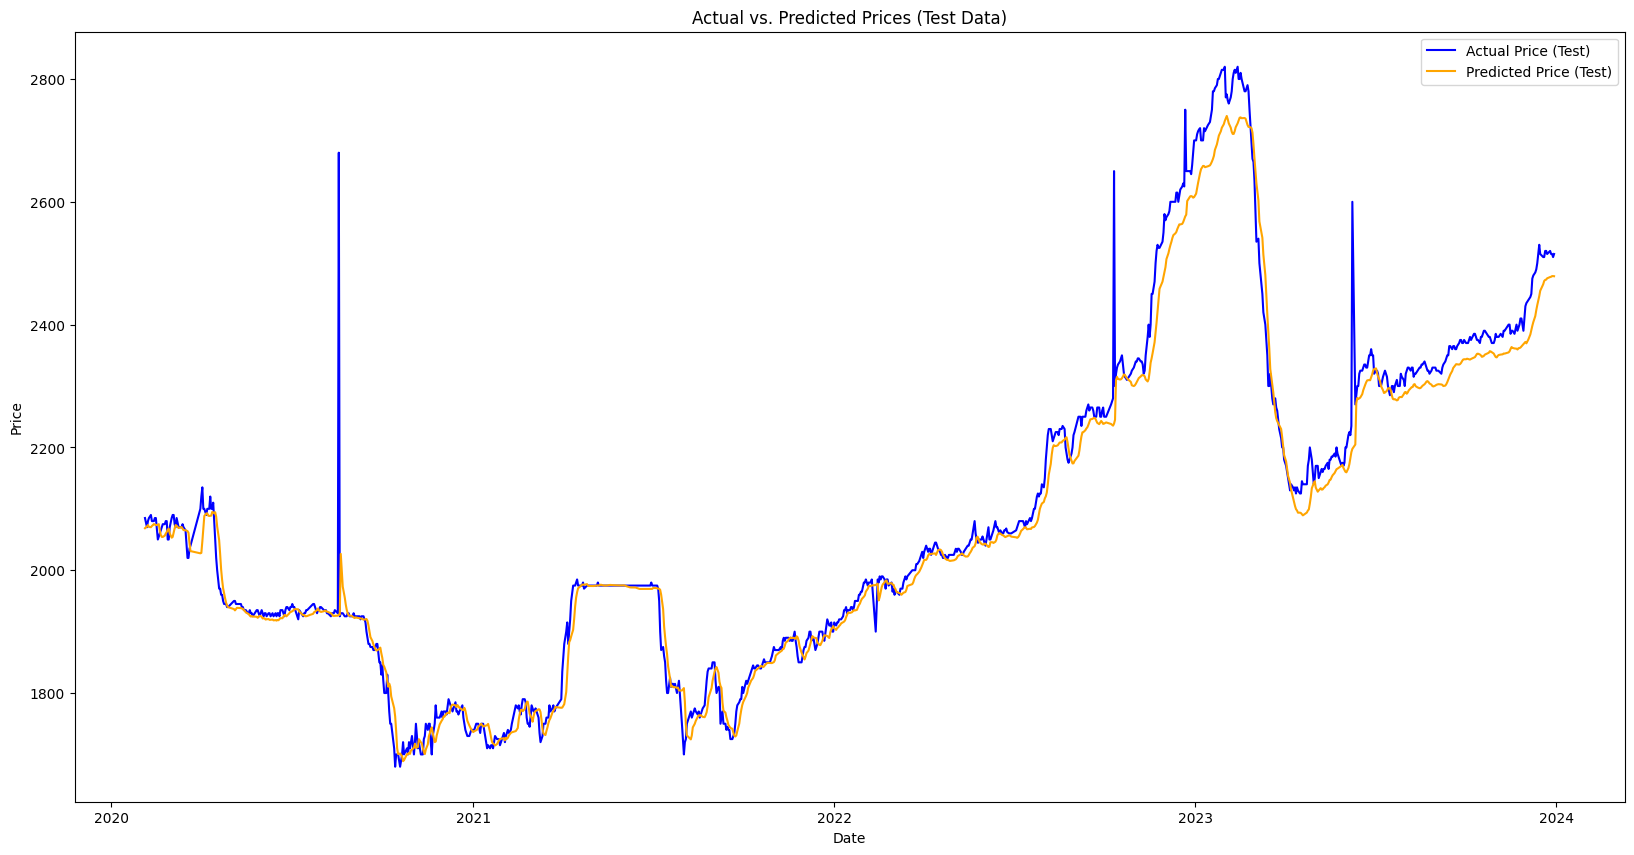

In [ ]:
plot_testing_data(test_predict)